Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Columna: Nacidos por mil habitantes
  Outliers detectados: 2
Columna: Defunciones por mil habitantes
  Outliers detectados: 3
Columna: Esperanza de vida al nacimiento. Mujeres
  Outliers detectados: 0
Columna: Esperanza de vida al nacimiento. Hombres
  Outliers detectados: 0
Columna: Edad media al primer matrimonio. Hombres
  Outliers detectados: 6
Columna: Edad media al primer matrimonio. Mujeres
  Outliers detectados: 4
Columna: Edad media al divorcio. Ambos sexos
  Outliers detectados: 4
Columna: Edad media al primer matrimonio. Hombres
  Outliers detectados: 6


<ipython-input-4-8cb1703f8e57>:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_ordenado['Provincias'], y=df_ordenado[columna], palette=color)


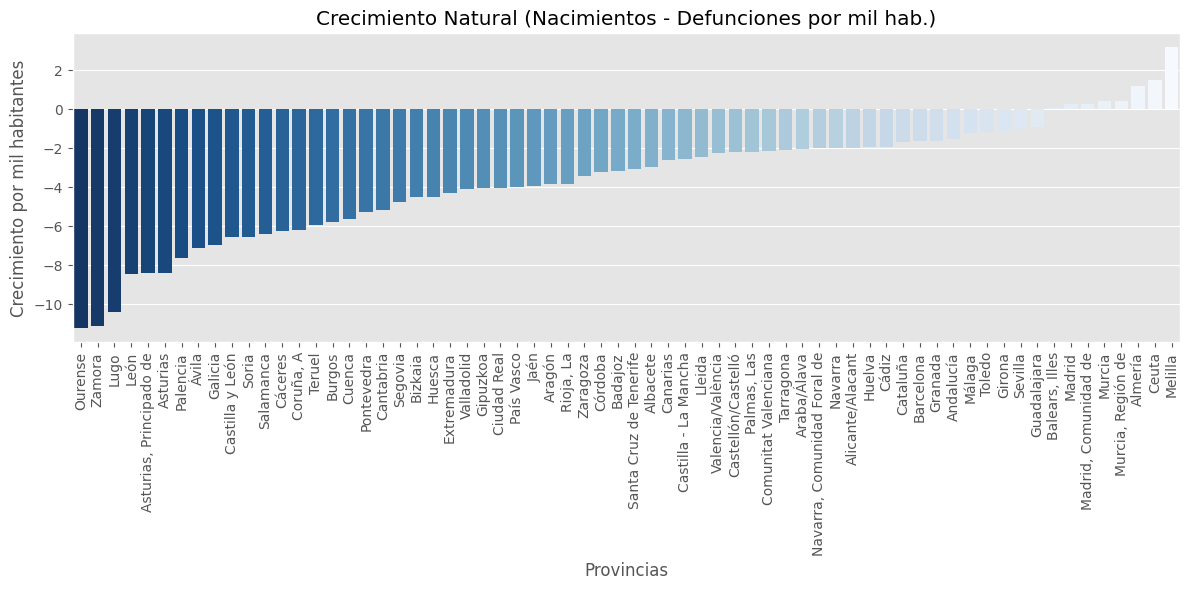

<ipython-input-4-8cb1703f8e57>:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_ordenado['Provincias'], y=df_ordenado[columna], palette=color)


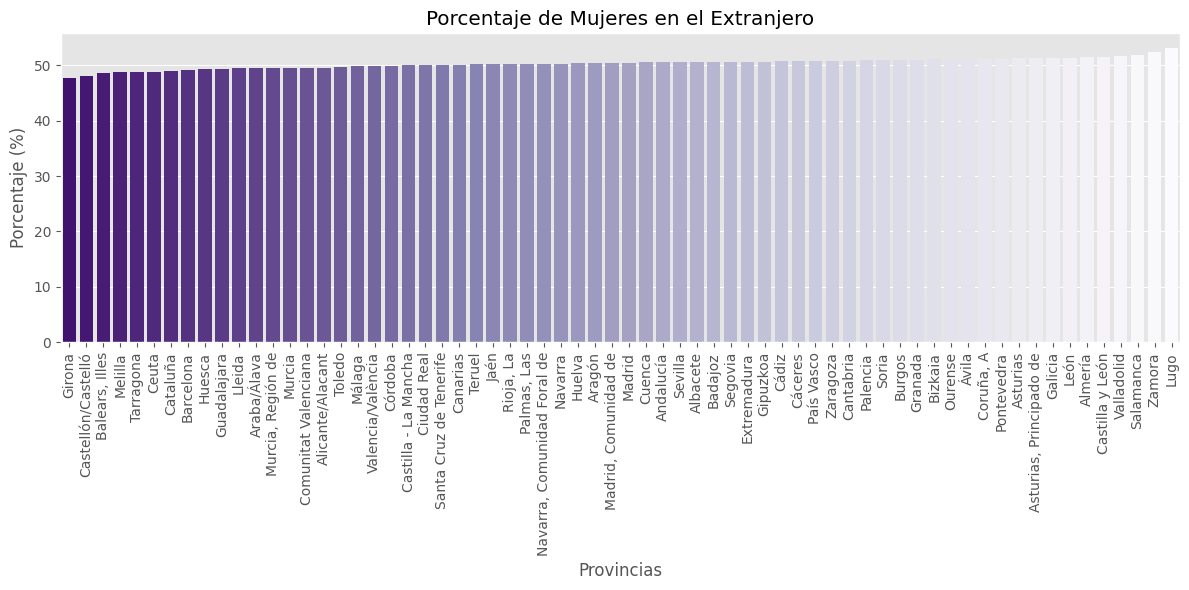

<ipython-input-4-8cb1703f8e57>:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_ordenado['Provincias'], y=df_ordenado[columna], palette=color)


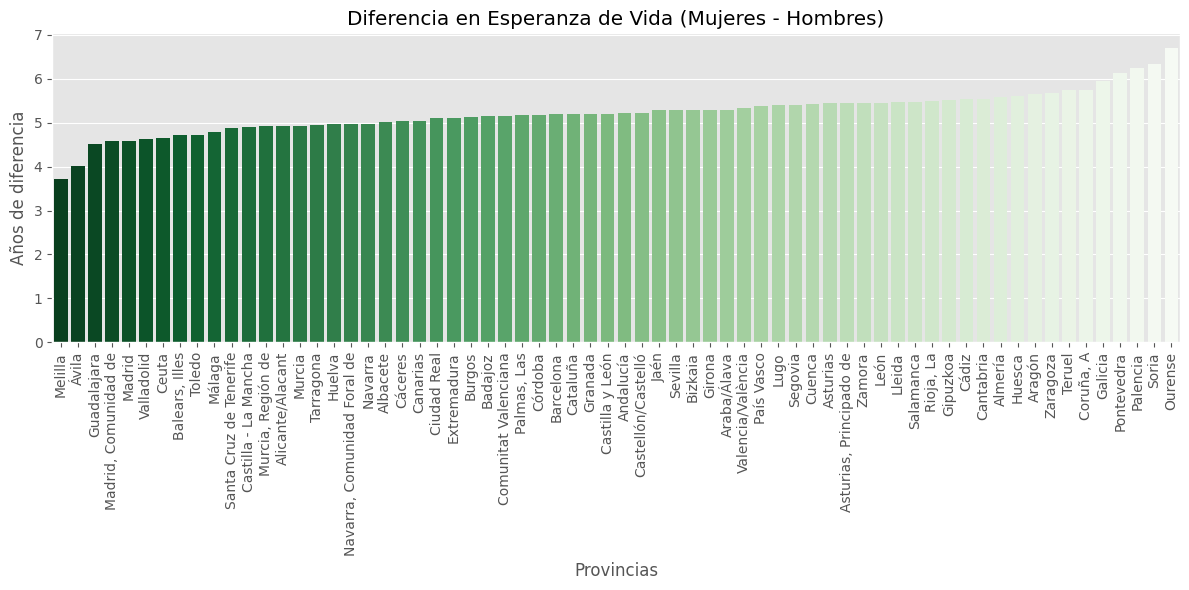

<ipython-input-4-8cb1703f8e57>:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_ordenado['Provincias'], y=df_ordenado[columna], palette=color)


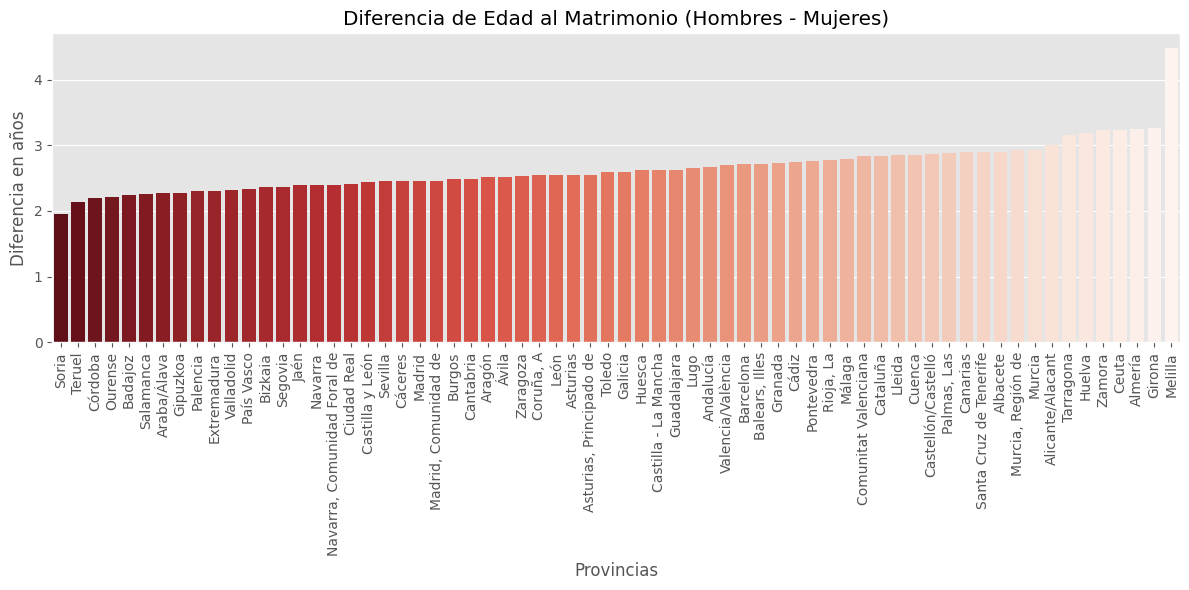

<ipython-input-4-8cb1703f8e57>:188: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_ordenado['Provincias'], y=df_ordenado[columna], palette=color)


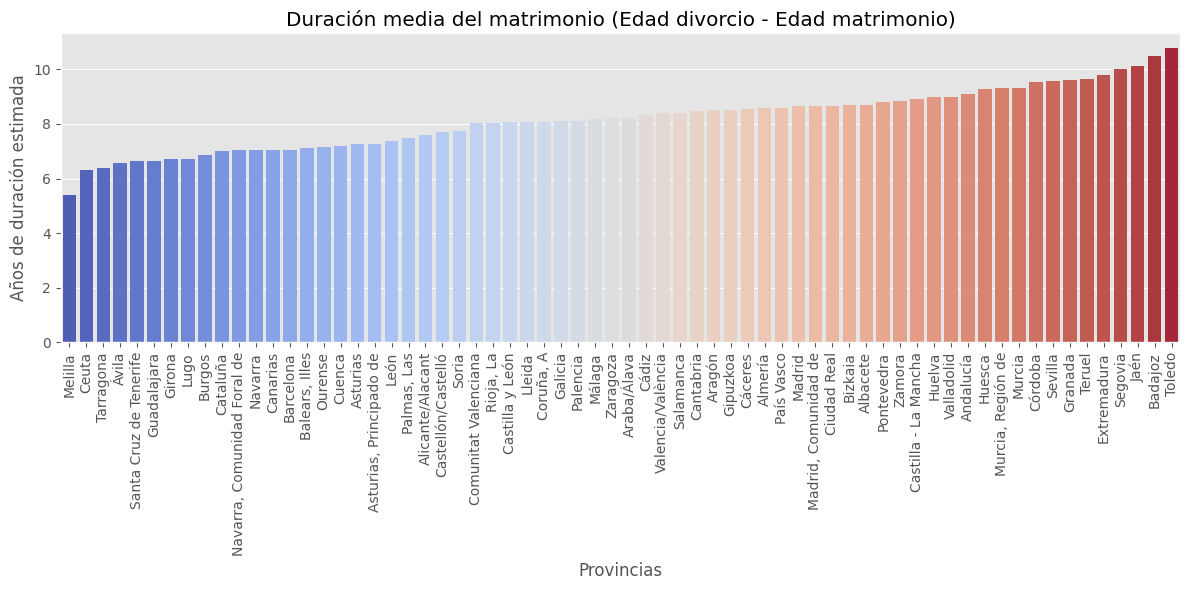

<Figure size 640x480 with 0 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# No se puede acceder a los datos del enlace https://www.ine.es/dynInfo/Infografia/Territoriales/capitulo.html#!tabla vía API porque:
#1. No es un enlace a una API pública del INE
#Ese enlace es una interfaz visual (front-end) hecha con JavaScript, no un punto de acceso a datos (API endpoint).

#2. Los datos se cargan dinámicamente
#Cuando visitas esa página, los datos se cargan en segundo plano con AJAX o JavaScript, por lo que no aparecen directamente en el código fuente de la página HTML.

#3. No forma parte del catálogo de datos del INEbase
#La API oficial del INE funciona sobre el catálogo de INEbase

# 2. Cargar archivo Excel desde Google Drive
from google.colab import drive
drive.mount('/content/drive')
ruta = '/content/drive/MyDrive/indicadores_ine.xlsx'
df = pd.read_excel(ruta)

# Diccionario con coordenadas aproximadas (capitales de provincia o administrativas)
coordenadas = {
    'Andalucía': (37.3886, -5.9823),
    'Almería': (36.8340, -2.4637),
    'Cádiz': (36.5297, -6.2924),
    'Córdoba': (37.8882, -4.7794),
    'Granada': (37.1773, -3.5986),
    'Huelva': (37.2614, -6.9447),
    'Jaén': (37.7796, -3.7849),
    'Málaga': (36.7213, -4.4214),
    'Sevilla': (37.3886, -5.9823),
    'Aragón': (41.6488, -0.8891),
    'Huesca': (42.1401, -0.4089),
    'Teruel': (40.3456, -1.1065),
    'Zaragoza': (41.6488, -0.8891),
    'Asturias, Principado de': (43.3623, -5.8480),
    'Asturias': (43.3623, -5.8480),
    'Balears, Illes': (39.5696, 2.6502),
    'Canarias': (28.4636, -16.2518),
    'Palmas, Las': (28.1272, -15.4314),
    'Santa Cruz de Tenerife': (28.4636, -16.2518),
    'Cantabria': (43.4623, -3.8099),
    'Castilla y León': (41.6523, -4.7245),
    'Ávila': (40.6565, -4.6818),
    'Burgos': (42.3439, -3.6969),
    'León': (42.5987, -5.5671),
    'Palencia': (42.0095, -4.5241),
    'Salamanca': (40.9701, -5.6635),
    'Segovia': (40.9429, -4.1088),
    'Soria': (41.7662, -2.4680),
    'Valladolid': (41.6523, -4.7245),
    'Zamora': (41.5033, -5.7446),
    'Castilla - La Mancha': (39.8628, -4.0273),
    'Albacete': (38.9942, -1.8584),
    'Ciudad Real': (38.9863, -3.9274),
    'Cuenca': (40.0704, -2.1374),
    'Guadalajara': (40.6333, -3.1669),
    'Toledo': (39.8628, -4.0273),
    'Cataluña': (41.3879, 2.1699),
    'Barcelona': (41.3879, 2.1699),
    'Girona': (41.9794, 2.8214),
    'Lleida': (41.6176, 0.6200),
    'Tarragona': (41.1189, 1.2445),
    'Comunitat Valenciana': (39.4699, -0.3763),
    'Alicante/Alacant': (38.3452, -0.4810),
    'Castellón/Castelló': (39.9864, -0.0513),
    'Valencia/València': (39.4699, -0.3763),
    'Extremadura': (38.8794, -6.9707),
    'Badajoz': (38.8794, -6.9707),
    'Cáceres': (39.4753, -6.3724),
    'Galicia': (43.3623, -8.4115),
    'Coruña, A': (43.3623, -8.4115),
    'Lugo': (43.0097, -7.5560),
    'Ourense': (42.3364, -7.8641),
    'Pontevedra': (42.4333, -8.6333),
    'Madrid, Comunidad de': (40.4168, -3.7038),
    'Madrid': (40.4168, -3.7038),
    'Murcia, Región de': (37.9847, -1.1284),
    'Murcia': (37.9847, -1.1284),
    'Navarra, Comunidad Foral de': (42.8125, -1.6458),
    'Navarra': (42.8125, -1.6458),
    'País Vasco': (43.2630, -2.9350),
    'Araba/Álava': (42.8467, -2.6727),
    'Gipuzkoa': (43.3128, -1.9748),
    'Bizkaia': (43.2630, -2.9350),
    'Rioja, La': (42.4650, -2.4480),
    'Ceuta': (35.8890, -5.3213),
    'Melilla': (35.2923, -2.9381)
}

# Crear columnas de latitud y longitud
df['Latitud'] = df['Provincias'].map(lambda x: coordenadas.get(x, (None, None))[0])
df['Longitud'] = df['Provincias'].map(lambda x: coordenadas.get(x, (None, None))[1])


# Ver las primeras filas
df.head()

# 3. Limpiar nombres de columnas
df.columns = df.columns.str.strip()

# 4. Convertir columnas numéricas (con coma a punto y a float)
columnas_a_convertir = [
    'Nacidos por mil habitantes', 'Defunciones por mil habitantes',
    'Esperanza de vida al nacimiento. Mujeres', 'Esperanza de vida al nacimiento. Hombres',
    'Edad media al primer matrimonio. Hombres', 'Edad media al primer matrimonio. Mujeres',
    'Edad media al divorcio. Ambos sexos', 'Edad media al primer matrimonio. Hombres'
]

for col in columnas_a_convertir:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Ver cantidad de valores nulos por columna
df.isnull().sum()

# Porcentaje de nulos por columna
(df.isnull().sum() / len(df)) * 100

# Detectar outliers con IQR para cada columna numérica:
for col in columnas_a_convertir:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = df[(df[col] < limite_inferior) | (df[col] > limite_superior)]

    print(f'Columna: {col}')
    print(f'  Outliers detectados: {len(outliers)}')

# Dejo los outliers porque sé que son válidos, pero si no lo fueran yo podría
# eliminar las filas con los outliers y reemplazarlos por el valor límite: %%

# Eliminar outliers de una columna (ejemplo con 'Divorcios')
#Q1 = df['Divorcios'].quantile(0.25)
#Q3 = df['Divorcios'].quantile(0.75)
#QR = Q3 - Q1
#limite_inf = Q1 - 1.5 * IQR
#limite_sup = Q3 + 1.5 * IQR

#df_sin_outliers = df[(df['Divorcios'] >= limite_inf) & (df['Divorcios'] <= limite_sup)]

# Reemplazar valores extremos por el límite superior/inferior
#df['Divorcios'] = np.where(df['Divorcios'] > limite_sup, limite_sup,
#                   np.where(df['Divorcios'] < limite_inf, limite_inf, df['Divorcios']))



# 1. Calculamos el índice de natalidad menos mortalidad (crecimiento natural):
df['Crecimiento_natural'] = df['Nacidos por mil habitantes'] - df['Defunciones por mil habitantes']

# 2. Calculamos el porcentaje de mujeres entre los residentes en el extranjero:
df['Porcentaje_mujeres_extranjero'] = (
    df['Población española residente en el extranjero. Mujeres'] /
    df['Población española residente en el extranjero. Total']
) * 100

# 3. Calculamos la diferencia de esperanza de vida entre mujeres y hombres:
df['Diferencia_esperanza_vida'] = df['Esperanza de vida al nacimiento. Mujeres'] - \
                                  df['Esperanza de vida al nacimiento. Hombres']

# 4. Calculamos la diferencia de edad en el matrimonio (hombres - mujeres):
df['Diferencia_edad_matrimonio'] = df['Edad media al primer matrimonio. Hombres'] - \
                                   df['Edad media al primer matrimonio. Mujeres']

# 5. Calculamos la duración media (teórica) del matrimonio:
df['Duracion_media_matrimonio'] = df['Edad media al divorcio. Ambos sexos'] - \
                                  df['Edad media al primer matrimonio. Hombres']


# Configuración de estilo para los gráficos
plt.style.use("ggplot")

# Asegurar que los nombres de las columnas están limpios
df.columns = df.columns.str.strip()

# Convertir columnas numéricas con comas a formato float
columnas_a_convertir = [
    'Nacidos por mil habitantes', 'Defunciones por mil habitantes',
    'Esperanza de vida al nacimiento. Mujeres', 'Esperanza de vida al nacimiento. Hombres',
    'Edad media al primer matrimonio. Hombres', 'Edad media al primer matrimonio. Mujeres'
]

for col in columnas_a_convertir:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Configuración de estilo general
plt.style.use("ggplot")

# Función reutilizable para graficar ordenado
def graficar_ordenado(df, columna, titulo, ylabel, color):
    df_ordenado = df.sort_values(by=columna)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=df_ordenado['Provincias'], y=df_ordenado[columna], palette=color)
    plt.title(titulo)
    plt.ylabel(ylabel)
    plt.xlabel("Provincias")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 1. Crecimiento Natural
graficar_ordenado(
    df, 'Crecimiento_natural',
    'Crecimiento Natural (Nacimientos - Defunciones por mil hab.)',
    'Crecimiento por mil habitantes', 'Blues_r'
)

# 2. Porcentaje de Mujeres en el Extranjero
graficar_ordenado(
    df, 'Porcentaje_mujeres_extranjero',
    'Porcentaje de Mujeres en el Extranjero',
    'Porcentaje (%)', 'Purples_r'
)

# 3. Diferencia en Esperanza de Vida
graficar_ordenado(
    df, 'Diferencia_esperanza_vida',
    'Diferencia en Esperanza de Vida (Mujeres - Hombres)',
    'Años de diferencia', 'Greens_r'
)

# 4. Diferencia de Edad al Matrimonio
graficar_ordenado(
    df, 'Diferencia_edad_matrimonio',
    'Diferencia de Edad al Matrimonio (Hombres - Mujeres)',
    'Diferencia en años', 'Reds_r'
)

# 5. Duración media del matrimonio
graficar_ordenado(
    df, 'Duracion_media_matrimonio',
    'Duración media del matrimonio (Edad divorcio - Edad matrimonio)',
    'Años de duración estimada', 'coolwarm'
)

# Ajustar diseño
plt.tight_layout()
plt.show()

df.head()

# Guardar el archivo como CSV para subirlo a Kepler.gl
df.to_csv('indicadores_geolocalizados.csv', index=False)

from google.colab import files
files.download('indicadores_geolocalizados.csv')